In [1]:
from os import getcwd, path
import torch as t
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Polygon, FancyArrowPatch, ArrowStyle

In [2]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb}"

In [3]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

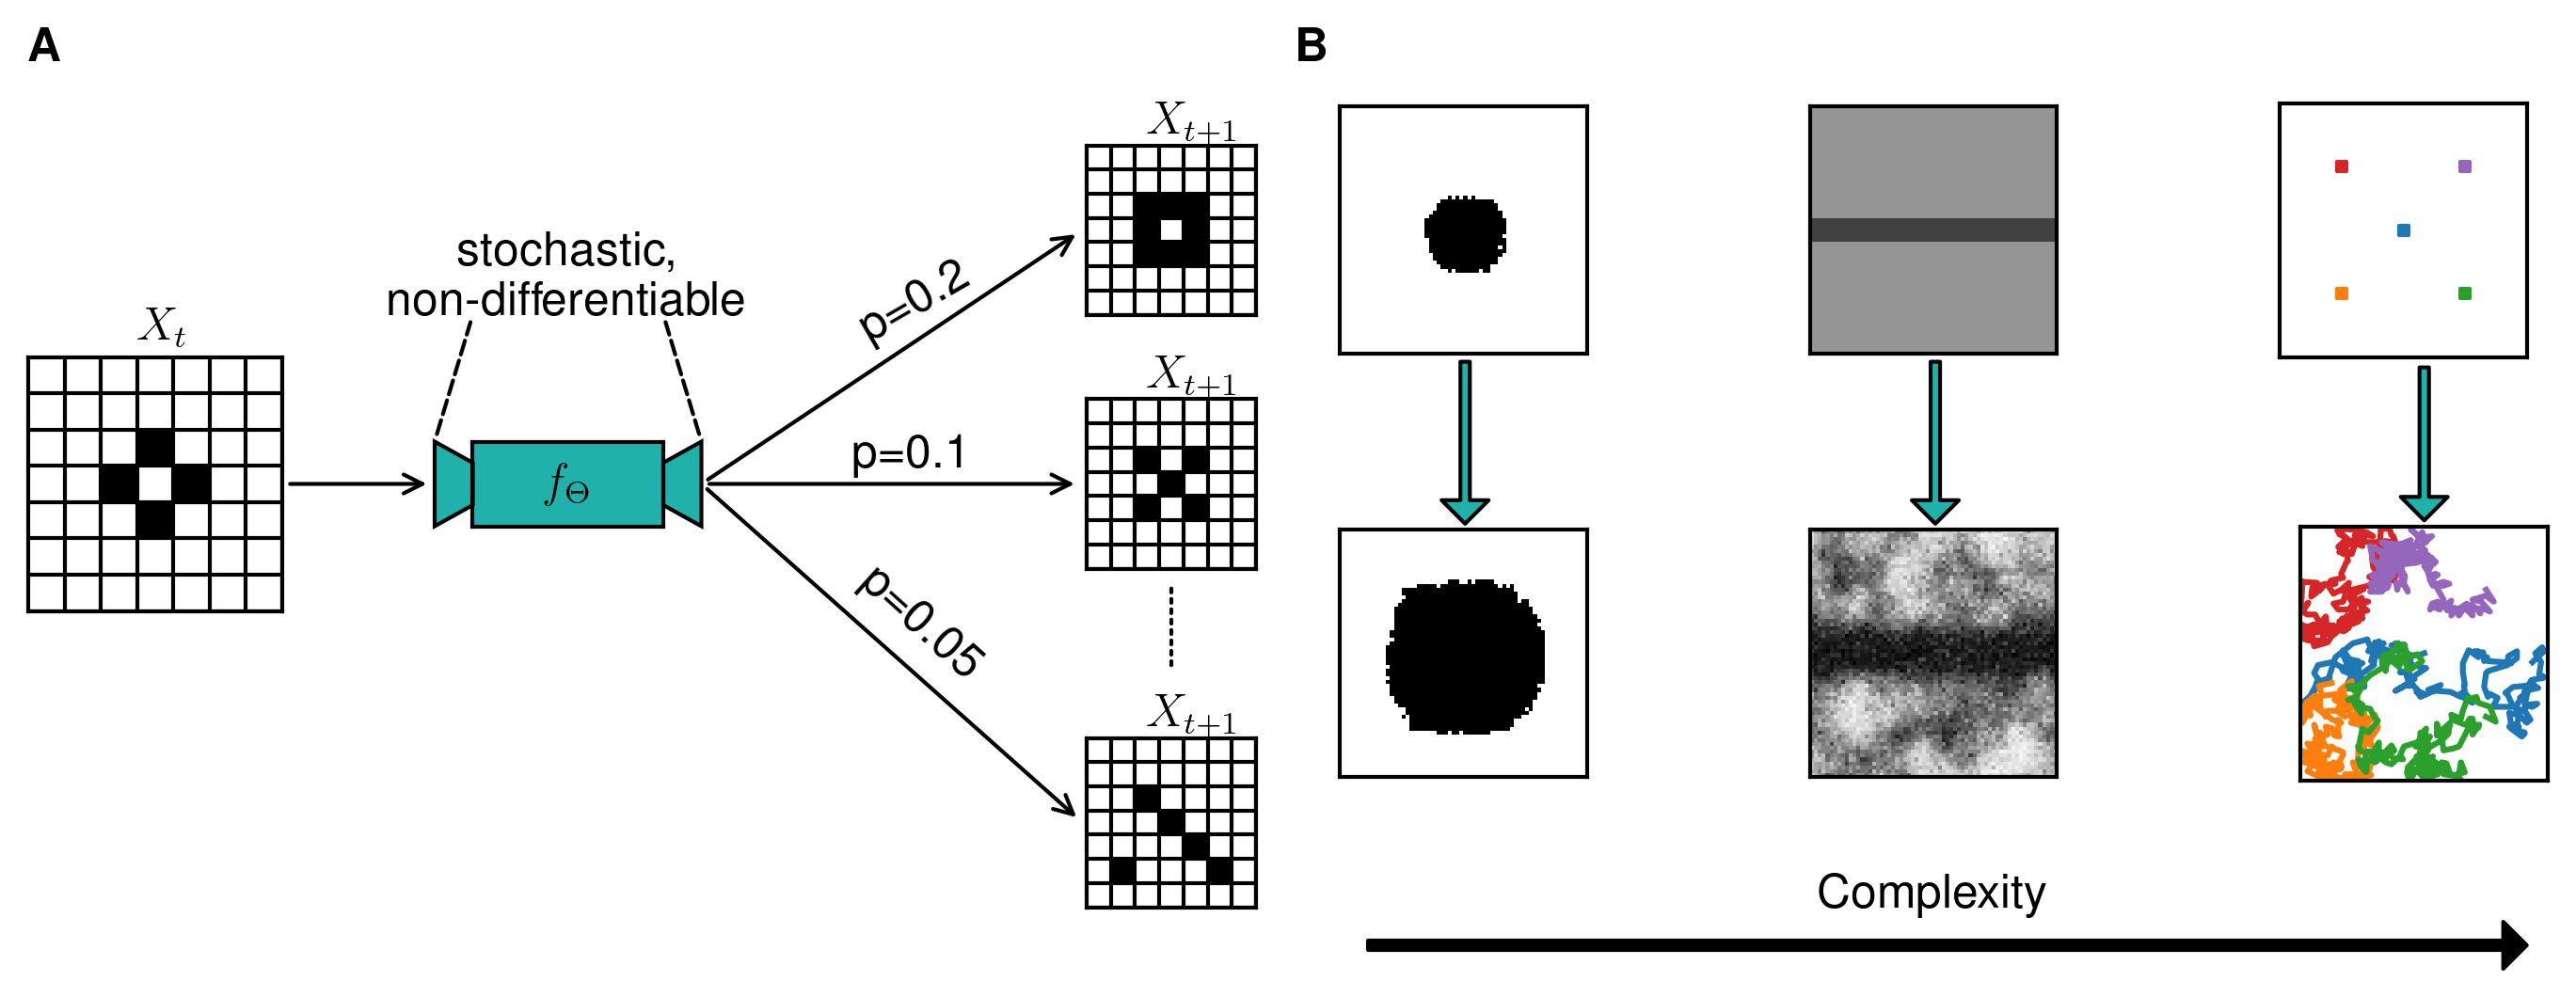

In [143]:
###
#   Define Figure
###

fig = plt.figure(layout='constrained', figsize=(9,3), dpi=300)
subfigs = fig.subfigures(1, 2, wspace=0.0, hspace=0., )

#####
#####
#       Subfigure 1: Lattice Model concept
#####
#####

###
#   Define the left lattice
###
#frame = subfigs[0].add_axes([0,0,1,1])
grid_t1 = subfigs[0].add_axes([-0.05, 0.35, 0.3, 0.3])
grid_t1_lattice = t.zeros((7,7))
grid_t1_lattice[2,3] = 1 
grid_t1_lattice[4,3] = 1 
grid_t1_lattice[3,2] = 1 
grid_t1_lattice[3,4] = 1 
grid_t1.imshow(grid_t1_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t1.grid(color='black', linewidth=1)
grid_t1.set_xticks(np.arange(.5, 7.5, 1))
grid_t1.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t1)
grid_t1.text(2.5,-1.0,"$X_t$")

###
#   Define the right lattice
###

grid_t2 = subfigs[0].add_axes([0.8, 0.7, 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
#grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1
grid_t2_lattice[3,2] = 1
grid_t2_lattice[2,3] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,3] = 1
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2_lattice[3,4] = 1
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

grid_t2 = subfigs[0].add_axes([0.8, 0.4, 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

grid_t2 = subfigs[0].add_axes([0.8, 0., 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[5,5] = 1 
grid_t2_lattice[5,1] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")
grid_t2.annotate('',
    xy = (3.,-3.),
    xytext = (3.,-7.0),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': 'dotted'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

###
#   Define the model representation
###

f_box = subfigs[0].add_axes([0.35, 0.45, 0.15, 0.1], facecolor="lightseagreen")
remove_ticklines(f_box)

pts_left = np.array([
    [0., 0.75],
    [-0.2, 1.],
    [-0.2, 0.],
    [0., 0.25],
    [0., 0.75]
])
p_left = Polygon(pts_left, color="lightseagreen", clip_on=False)
p_left.set_edgecolor("black")
f_box.add_patch(p_left)

pts_right = np.array([
    [1., 0.75],
    [1.2, 1.],
    [1.2, 0.],
    [1., 0.25],
    [1., 0.75]
])
p_right = Polygon(pts_right, color="lightseagreen", clip_on=False)
p_right.set_edgecolor("black")
f_box.add_patch(p_right)
f_box.text(0.5,0.5,"$f_\\Theta$", ha="center", va="center", transform=f_box.transAxes)

f_box.annotate('',
    xy = (-0.2,0.5),
    xytext = (-1.,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,3.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,0.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,-3.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (0,2.5),
    xytext = (-0.2,1),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (1,2.5),
    xytext = (1.2,1),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.text(0.5, 2.5, "stochastic,\nnon-differentiable", ha="center", transform=f_box.transAxes)
f_box.text(2.,0.7,"p=0.1")
f_box.text(2.,2.2,"p=0.2",rotation=30)
f_box.text(2.,-1.8,"p=0.05",rotation=-42)


#####
#####
#       Subfigure 2: Model examples
#####
#####


rhs = subfigs[1].subfigures(1,3)
#frame2 = subfigs[1].add_axes([0,0,1,1])
rhs[0].text(0.,1.,"\\textbf{B}")
#rhs[1].text(0.1,1.,"\\textbf{C}")
#rhs[2].text(0.,1.,"\\textbf{D}")

###
#   Add the complexity arrow
###

bounding_1 = rhs[0].add_axes([0,0.,1,0.9])
bounding_1.axis("off")
bounding_1.annotate('',
    xy = (3.,-0.05),
    xytext = (0.15,-0.05),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=100
)
rhs[1].text(0.5,0.,"Complexity",ha="center")

###
#   Code for the SI model example
###

example_1 = rhs[0]
si_sequence = np.load(path.join(getcwd(), "data", "si_sample", "sequence.npy"))
start_ex1 = example_1.add_axes([0.1,0.5,0.6,0.6])
remove_ticklines(start_ex1)
start_ex1.imshow(si_sequence[10], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

progress_ex1 = example_1.add_axes([0.1,0.,0.6,0.6])
remove_ticklines(progress_ex1)
progress_ex1.imshow(si_sequence[20], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
progress_ex1.annotate('',
    xy = (32,0),
    xytext = (32,-46),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black"
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)

###
#   Code for the CPM-R model
###

grid_width = 0.6
grid_height = grid_width/2

example_2 = rhs[2]
cpm_r_centroids = np.load(path.join(getcwd(), "data", "cpm_r_sample", "centroids.npy")).round(1)

cpm_r_lattice = np.zeros((512,512))

grid_ex2 = example_2.add_axes([0.35,0.15,grid_width,grid_height])
#grid_ex2.imshow(cpm_r_lattice)
#grid_ex2.scatter(centroids[:,0], centroids[:,1])
for i in range(5):
    grid_ex2.plot(cpm_r_centroids[::500,i,0], cpm_r_centroids[::500,i,1], marker=None)
    #grid_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", color="black", zorder=10, s=1)
grid_ex2.set_xlim(0,128)
grid_ex2.set_ylim(0,128)
remove_ticklines(grid_ex2)
grid_ex2.annotate('',
    xy = (64,127),
    xytext = (64,212),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black"
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)


grid2_ex2 = example_2.add_axes([0.3,0.65,grid_width,grid_height])
for i in range(5):
    grid2_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", zorder=10, s=5)
grid2_ex2.set_xlim(0,128)
grid2_ex2.set_ylim(0,128)
remove_ticklines(grid2_ex2)


###
#   Code for the FHN model
###

grid_size = 0.6

example_3 = rhs[1]
fhn_sequence = np.load(path.join(getcwd(), "data", "fhn_sample", "sequence.npy"))
start_ex3 = example_3.add_axes([0.2,0.5,grid_size,grid_size])
remove_ticklines(start_ex3)
start_ex3.imshow(fhn_sequence[0][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

#progress_ex3 = example_3.add_axes([0.6,0.6,0.3,0.3])
#remove_ticklines(progress_ex3)
#progress_ex3.imshow(fhn_sequence[4000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

end_ex3 = example_3.add_axes([0.2,0.,grid_size,grid_size])
remove_ticklines(end_ex3)
end_ex3.imshow(fhn_sequence[10_000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)
end_ex3.annotate('',
    xy = (32,0),
    xytext = (32,-46),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)

subfigs[0].text(0.,1,"\\textbf{A}")

plt.show()

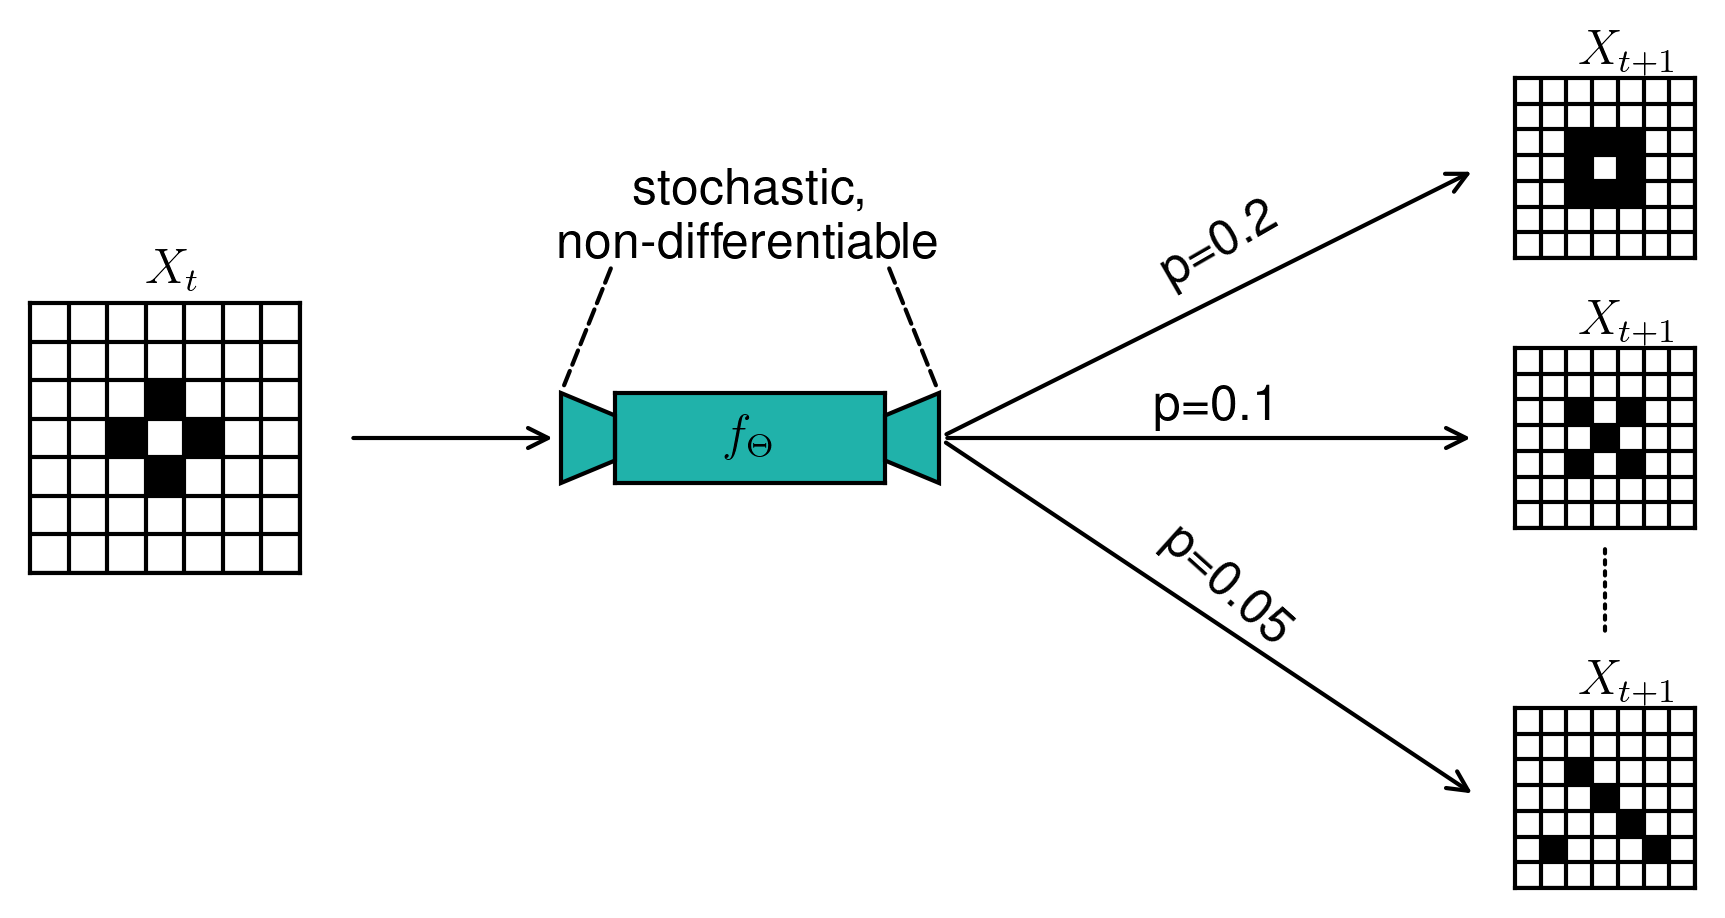

In [5]:
###
#   Define Figure
###

fig = plt.figure(layout='constrained', figsize=(6,3), dpi=300)

#####
#####
#       Subfigure 1: Lattice Model concept
#####
#####

###
#   Define the left lattice
###
#frame = subfigs[0].add_axes([0,0,1,1])
grid_t1 = fig.add_axes([-0.05, 0.35, 0.3, 0.3])
grid_t1_lattice = t.zeros((7,7))
grid_t1_lattice[2,3] = 1 
grid_t1_lattice[4,3] = 1 
grid_t1_lattice[3,2] = 1 
grid_t1_lattice[3,4] = 1 
grid_t1.imshow(grid_t1_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t1.grid(color='black', linewidth=1)
grid_t1.set_xticks(np.arange(.5, 7.5, 1))
grid_t1.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t1)
grid_t1.text(2.5,-1.0,"$X_t$")

###
#   Define the right lattice
###

grid_t2 = fig.add_axes([0.8, 0.7, 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
#grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1
grid_t2_lattice[3,2] = 1
grid_t2_lattice[2,3] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,3] = 1
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2_lattice[3,4] = 1
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

grid_t2 = fig.add_axes([0.8, 0.4, 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

grid_t2 = fig.add_axes([0.8, 0., 0.2, 0.2])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[5,5] = 1 
grid_t2_lattice[5,1] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")
grid_t2.annotate('',
    xy = (3.,-3.),
    xytext = (3.,-7.0),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': 'dotted'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

###
#   Define the model representation
###

f_box = fig.add_axes([0.35, 0.45, 0.15, 0.1], facecolor="lightseagreen")
remove_ticklines(f_box)

pts_left = np.array([
    [0., 0.75],
    [-0.2, 1.],
    [-0.2, 0.],
    [0., 0.25],
    [0., 0.75]
])
p_left = Polygon(pts_left, color="lightseagreen", clip_on=False)
p_left.set_edgecolor("black")
f_box.add_patch(p_left)

pts_right = np.array([
    [1., 0.75],
    [1.2, 1.],
    [1.2, 0.],
    [1., 0.25],
    [1., 0.75]
])
p_right = Polygon(pts_right, color="lightseagreen", clip_on=False)
p_right.set_edgecolor("black")
f_box.add_patch(p_right)
f_box.text(0.5,0.5,"$f_\\Theta$", ha="center", va="center", transform=f_box.transAxes)

f_box.annotate('',
    xy = (-0.2,0.5),
    xytext = (-1.,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,3.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,0.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (3.2,-3.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': "->",
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (0,2.5),
    xytext = (-0.2,1),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.annotate('',
    xy = (1,2.5),
    xytext = (1.2,1),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.text(0.5, 2.5, "stochastic,\nnon-differentiable", ha="center", transform=f_box.transAxes)
f_box.text(2.,0.7,"p=0.1")
f_box.text(2.,2.2,"p=0.2",rotation=30)
f_box.text(2.,-1.8,"p=0.05",rotation=-42)
plt.show()


Text(32, -46, '')

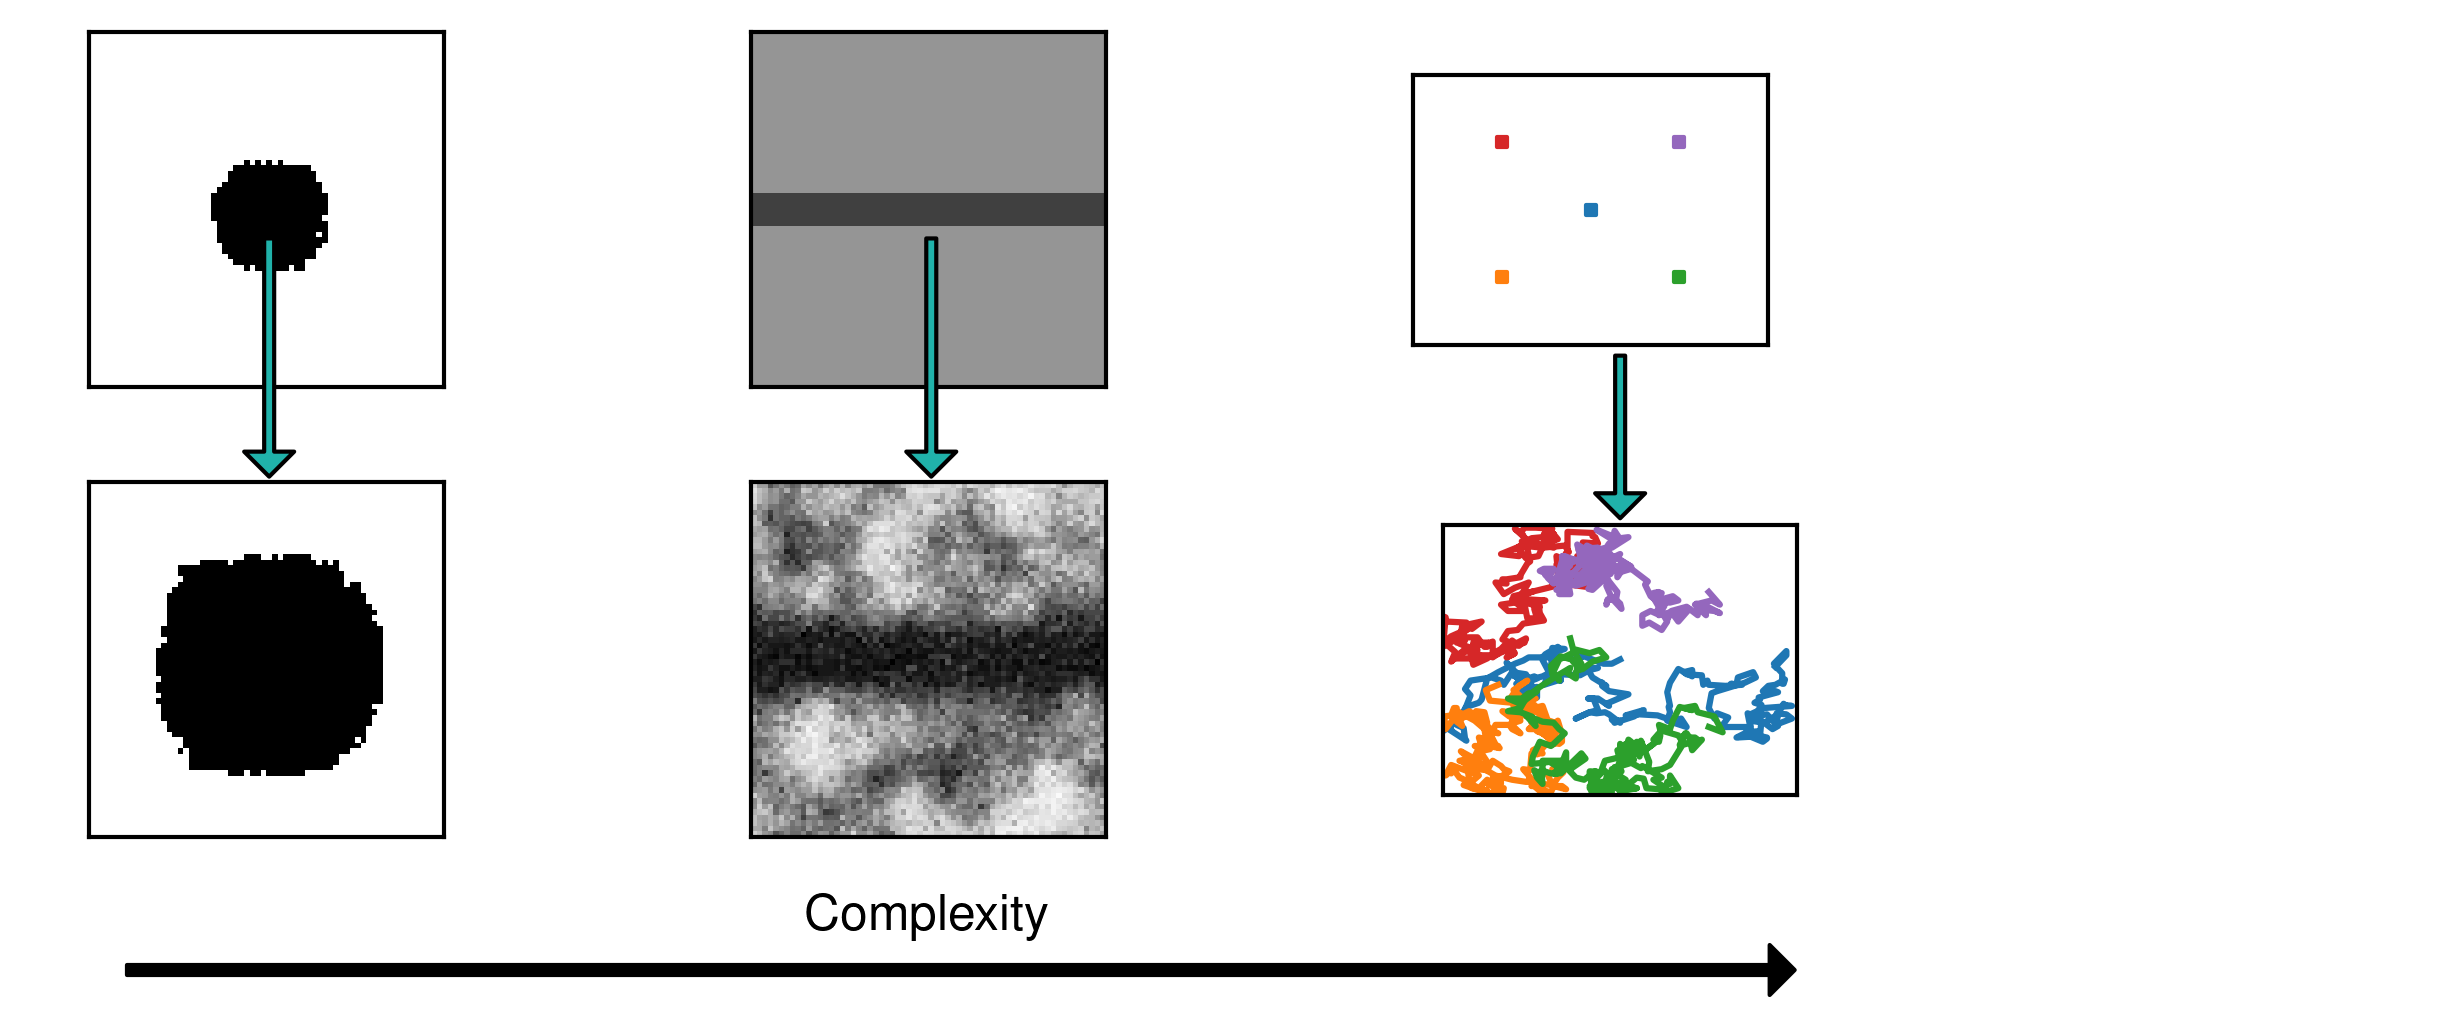

In [11]:
fig = plt.figure(layout='constrained', figsize=(8,3), dpi=300)
rhs = fig.subfigures(1,4)
#frame2 = subfigs[1].add_axes([0,0,1,1])
#rhs[0].text(0.,1.,"\\textbf{B}")
#rhs[1].text(0.1,1.,"\\textbf{C}")
#rhs[2].text(0.,1.,"\\textbf{D}")

###
#   Add the complexity arrow
###

bounding_1 = rhs[0].add_axes([0,0.,1,0.9])
bounding_1.axis("off")
bounding_1.annotate('',
    xy = (3.,-0.05),
    xytext = (0.15,-0.05),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=100
)
rhs[1].text(0.5,0.,"Complexity",ha="center")

###
#   Code for the SI model example
###

example_1 = rhs[0]
si_sequence = np.load(path.join(getcwd(), "data", "si_sample", "sequence.npy"))
start_ex1 = example_1.add_axes([0.1,0.5,0.6,0.6])
remove_ticklines(start_ex1)
start_ex1.imshow(si_sequence[10], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

progress_ex1 = example_1.add_axes([0.1,0.,0.6,0.6])
remove_ticklines(progress_ex1)
progress_ex1.imshow(si_sequence[20], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
progress_ex1.annotate('',
    xy = (32,0),
    xytext = (32,-46),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black"
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)

###
#   Code for the CPM-R model
###

grid_width = 0.6
grid_height = grid_width/2

example_2 = rhs[2]
cpm_r_centroids = np.load(path.join(getcwd(), "data", "cpm_r_sample", "centroids.npy")).round(1)

cpm_r_lattice = np.zeros((512,512))

grid_ex2 = example_2.add_axes([0.35,0.15,grid_width,grid_height])
#grid_ex2.imshow(cpm_r_lattice)
#grid_ex2.scatter(centroids[:,0], centroids[:,1])
for i in range(5):
    grid_ex2.plot(cpm_r_centroids[::500,i,0], cpm_r_centroids[::500,i,1], marker=None)
    #grid_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", color="black", zorder=10, s=1)
grid_ex2.set_xlim(0,128)
grid_ex2.set_ylim(0,128)
remove_ticklines(grid_ex2)
grid_ex2.annotate('',
    xy = (64,127),
    xytext = (64,212),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black"
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)


grid2_ex2 = example_2.add_axes([0.3,0.65,grid_width,grid_height])
for i in range(5):
    grid2_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", zorder=10, s=5)
grid2_ex2.set_xlim(0,128)
grid2_ex2.set_ylim(0,128)
remove_ticklines(grid2_ex2)


###
#   Code for the FHN model
###

grid_size = 0.6

example_3 = rhs[1]
fhn_sequence = np.load(path.join(getcwd(), "data", "fhn_sample", "sequence.npy"))
start_ex3 = example_3.add_axes([0.2,0.5,grid_size,grid_size])
remove_ticklines(start_ex3)
start_ex3.imshow(fhn_sequence[0][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

#progress_ex3 = example_3.add_axes([0.6,0.6,0.3,0.3])
#remove_ticklines(progress_ex3)
#progress_ex3.imshow(fhn_sequence[4000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

end_ex3 = example_3.add_axes([0.2,0.,grid_size,grid_size])
remove_ticklines(end_ex3)
end_ex3.imshow(fhn_sequence[10_000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)
end_ex3.annotate('',
    xy = (32,0),
    xytext = (32,-46),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'facecolor': "lightseagreen",
        'edgecolor': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:24<00:00,  5.90it/s]


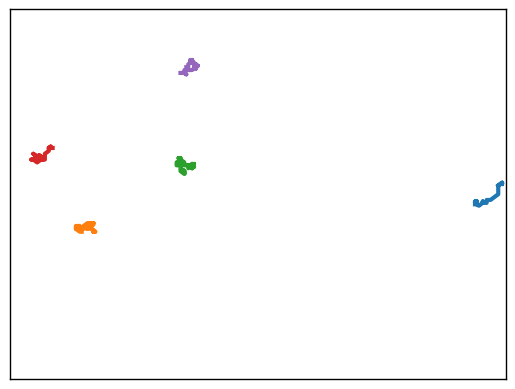

In [8]:
from tqdm import tqdm
cpm_r_centroids = np.load(path.join(getcwd(), "data", "cpm_r_sample", "centroids.npy")).round(1)

cpm_r_lattice = np.zeros((512,512))

#grid_ex2.imshow(cpm_r_lattice)
#grid_ex2.scatter(centroids[:,0], centroids[:,1])
points_x1 = []
points_y1 = []
points_x2 = []
points_y2 = []
points_x3 = []
points_y3 = []
points_x4 = []
points_y4 = []
points_x5 = []
points_y5 = []
step_size = 200
for i in tqdm(range(0,100_000,step_size)):
    points_x1 += cpm_r_centroids[i:i+step_size,0,0].tolist()
    points_y1 += cpm_r_centroids[i:i+step_size,0,1].tolist()
    points_x2 += cpm_r_centroids[i:i+step_size,1,0].tolist()
    points_y2 += cpm_r_centroids[i:i+step_size,1,1].tolist()
    points_x3 += cpm_r_centroids[i:i+step_size,2,0].tolist()
    points_y3 += cpm_r_centroids[i:i+step_size,2,1].tolist()
    points_x4 += cpm_r_centroids[i:i+step_size,3,0].tolist()
    points_y4 += cpm_r_centroids[i:i+step_size,3,1].tolist()
    points_x5 += cpm_r_centroids[i:i+step_size,4,0].tolist()
    points_y5 += cpm_r_centroids[i:i+step_size,4,1].tolist()
    if len(points_x1) > 500:
        points_x1 = points_x1[step_size:]
        points_y1 = points_y1[step_size:]
        points_x2 = points_x2[step_size:]
        points_y2 = points_y2[step_size:]
        points_x3 = points_x3[step_size:]
        points_y3 = points_y3[step_size:]
        points_x4 = points_x4[step_size:]
        points_y4 = points_y4[step_size:]
        points_x5 = points_x5[step_size:]
        points_y5 = points_y5[step_size:]
    plt.cla()
    plt.plot(points_x1, points_y1, marker=None, lw=3)
    plt.plot(points_x2, points_y2, marker=None, lw=3)
    plt.plot(points_x3, points_y3, marker=None, lw=3)
    plt.plot(points_x4, points_y4, marker=None, lw=3)
    plt.plot(points_x5, points_y5, marker=None, lw=3)
    remove_ticklines(plt.gca())
    plt.xlim(0,128)
    plt.ylim(0,128)
    plt.savefig(f"./cpm_vis/{i}.png", bbox_inches="tight")
    
    #grid_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", color="black", zorder=10, s=1)

In [9]:
import imageio
from tqdm import tqdm
images = []
for i in tqdm(range(0,100_000,step_size)):
    images.append(imageio.imread(f"./cpm_vis/{i}.png"))

imageio.mimsave("./vis.gif", images)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\jsche\AppData\Local\Temp\ipykernel_10148\583644047.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"./cpm_vis/{i}.png"))
100%|██████████| 500/500 [00:03<00:00, 125.43it/s]
